<p style="font-family: Calibri; font-size:3.75em;color:olive; font-style:bold"><br>
MovieLens dataset: Genre Analysis</p><br>
MovieLens (a movie recommendation site) provides datasets with movie ratings on a 5-star scale for 30 years of movies. In addition, it also classifies movies into genres. A movie might be classified into one or more genres. 

This analysis focuses on which genre overall **is most popular** and how this has changed in the period 1965-2015. 

<p style="font-family: Calibri; font-size:2.00em;color:cadetblue; font-style:bold">
Import libraries</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates

<p style="font-family: Calibri; font-size:2.00em;color:cadetblue; font-style:bold">
Import datasets</p>

Both the movies.csv and the ratings.csv dataset will be used

In [2]:
movies_raw = pd.read_csv('../Week-4-Pandas/movielens/movies.csv', sep=',')
movies_raw.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_raw.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


In [4]:
ratings_raw = pd.read_csv('../Week-4-Pandas/movielens/ratings.csv', sep=',')
ratings_raw.head(5)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
ratings_raw.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


<p style="font-family: Calibri; font-size:2.00em;color:cadetblue; font-style:bold">
Identify the year in which the movie came out </p>

The *title* column in the movies dataset also contains the year, which has to split out so that it can be used in the analysis. The raw dataset is copied into a new dataset, which can then be modified. This way, the original data is not changed in any way.

In [6]:
#create a copy of the source dataset
movies = movies_raw.copy()
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Extract the year from the 'title' column and add to a new column 'year'
movies['year'] = movies['title'].str.extract('\((\d{4})\)$')

C:\Users\chant\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [8]:
# check the 'year' column - it should only contain actual, 4-digit years
movies['year'].value_counts()

2009    1105
2013     997
2012     997
2011     991
2008     971
2010     942
2007     894
2006     848
2014     737
2005     733
2004     703
2002     675
2003     653
2001     630
2000     613
1998     552
1999     537
1997     527
1996     509
1995     469
1994     431
1993     369
1992     335
1988     322
1987     312
1990     312
1991     312
1989     309
1986     262
1985     253
        ... 
1926      40
1925      32
1927      31
1924      30
1921      27
1922      25
1920      19
1916      17
1923      17
1919      17
1915      17
1914      13
1917      12
1918       8
1898       5
1912       5
1913       5
1910       3
1896       2
1894       2
1895       2
1909       2
1903       1
1901       1
1891       1
1899       1
1893       1
1905       1
1900       1
1902       1
Name: year, Length: 118, dtype: int64

In [9]:
# Remove the year from the title
movies['title'] = movies['title'].str.replace('( \(\d{4}\))', "")

In [10]:
# Check the dataframe
movies.sample(15)

,movieId,title,genres,year
11162,46954,Just love me (Tylko mnie kochaj),Comedy|Romance,2006
10515,39414,Shopgirl,Comedy|Drama|Romance,2005
9637,31086,Battles Without Honor & Humanity (Jingi naki t...,Crime|Drama,1973
17465,88022,Hot Coffee,Documentary,2011
8292,8975,Fabled,Drama|Mystery|Thriller,2002
20540,100553,Frozen Planet,Documentary,2011
14206,71248,Extract,Comedy,2009
26127,125632,In Our Garden,(no genres listed),NaN
25465,120478,The Salt of the Earth,Documentary,2014
15964,80893,Grimm Love (Rohtenburg),Drama|Horror,2006


In [11]:
#Even though most rows contain an actual year, some records do not. These will be excluded from further analysis
#by converting the 'year' column to numeric. Each value that cannot be changed, will be set to NaN and discarded
movies['year'] = pd.to_numeric(movies['year'], errors="coerce")
movies = movies.dropna()
movies['year'] = movies['year'].astype(int)

In [12]:
movies.year.value_counts().sort_index()

1891       1
1893       1
1894       2
1895       2
1896       2
1898       5
1899       1
1900       1
1901       1
1902       1
1903       1
1905       1
1909       2
1910       3
1912       5
1913       5
1914      13
1915      17
1916      17
1917      12
1918       8
1919      17
1920      19
1921      27
1922      25
1923      17
1924      30
1925      32
1926      40
1927      31
        ... 
1986     262
1987     312
1988     322
1989     309
1990     312
1991     312
1992     335
1993     369
1994     431
1995     469
1996     509
1997     527
1998     552
1999     537
2000     613
2001     630
2002     675
2003     653
2004     703
2005     733
2006     848
2007     894
2008     971
2009    1105
2010     942
2011     991
2012     997
2013     997
2014     737
2015     120
Name: year, Length: 118, dtype: int64

In [13]:
#the last check is to ensure only years in the range 1965 - 2015 are included (this period is selected
#to cover exactly 50 years; the dataset ends in 2015)
movies1965_2015 = (movies['year'] >= 1965)
movies50 = movies[movies1965_2015]
movies50.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [14]:
print("The original dataset contained " + str(len(movies_raw.index)) + " rows")
print("The cleaned dataset contains " + str(len(movies)) + " rows")
print("The cleaned and filtered dataset contains " + str(len(movies50)) + " rows")

The original dataset contained 27278 rows
The cleaned dataset contains 27049 rows
The cleaned and filtered dataset contains 22519 rows


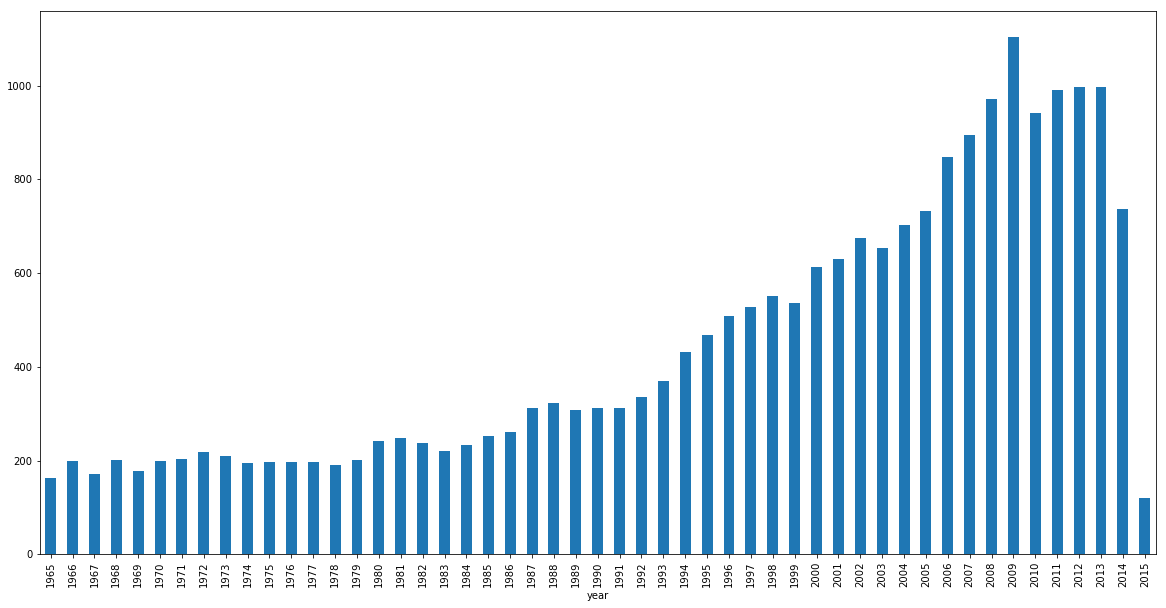

In [15]:
#visualise the number of movies that came out per year for the period 1965 - 2015
movies_count = movies50.groupby('year')['title'].count()
movies_count.head()

movies_count.plot.bar(figsize=(20,10))
plt.style.use('seaborn-pastel')
plt.show()

<p style="font-family: Calibri; font-size:2.00em;color:cadetblue; font-style:bold">
Split the 'genre' column into individual genres</p>

The 'genre' column classifies the movie into one or multiple genres by listing the genres separated with a '|'. There are 18 unique genres: 
* Adventure
* Comedy
* Action
* Crime
* Drama
* Children
* Mystery
* Documentary
* Animation
* Fantasy
* Horror
* Film-Noir
* Sci-Fi
* Musical
* Romance
* Thriller
* War
* Western

In [16]:
genres_list = ['Adventure', 'Comedy', 'Action', 'Crime', 'Drama', 'Children', 'Mystery', 'Documentary', 'Animation', 'Fantasy', 
               'Horror', 'Film-Noir', 'Sci-Fi', 'Musical', 'Romance', 'Thriller', 'War', 'Western']


genres_df = pd.DataFrame(columns=genres_list)

In [17]:
movies50 = pd.concat([movies50, genres_df], axis=1)

In [18]:
for i in genres_list:
    movies50[i] = (movies50["genres"].str.contains(i))

In [19]:
movies50 = movies50.applymap(lambda x:1 if x == True else x)
movies50 = movies50.applymap(lambda x:0 if x == False else x)
movies50.head()

,movieId,title,genres,year,Adventure,Comedy,Action,Crime,Drama,Children,...,Animation,Fantasy,Horror,Film-Noir,Sci-Fi,Musical,Romance,Thriller,War,Western
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children|Fantasy,1995,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Add a column to the df to calculate the total number of genres
movies50['total_genres'] = 0

movies50.head()

,movieId,title,genres,year,Adventure,Comedy,Action,Crime,Drama,Children,...,Fantasy,Horror,Film-Noir,Sci-Fi,Musical,Romance,Thriller,War,Western,total_genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children|Fantasy,1995,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
for i in genres_list:
    movies50['total_genres'] += movies50[i]

In [22]:
#Show the number of movies per total_genres
movies50.groupby('total_genres')['title'].count()

#As shown below, the number of genres per movie ranges from 0 to 10, with most movies having one genre (i.e. 'pure-genre' movie)

total_genres
0      182
1     8919
2     7156
3     4374
4     1417
5      387
6       65
7       14
8        4
10       1
Name: title, dtype: int64

<p style="font-family: Calibri; font-size:2.00em;color:cadetblue; font-style:bold">
Join the movies df with the ratings df </p>

Now that I have a movies dataframe which shows the individual genres and total genres per movie, I can join it with the ratings dataframe to calculate the average rating per genre, and the average rating per genre per year.
To do so, I first calculate the average rating per movie.

In [23]:
ratings_raw.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [24]:
mean_ratings = ratings_raw.groupby('movieId', as_index=False).mean()
mean_ratings.head()

,movieId,userId,rating,timestamp
0,1,69282.396821,3.921240,1.052654e+09
1,2,69169.928202,3.211977,1.037616e+09
2,3,69072.079388,3.151040,9.596480e+08
3,4,69652.913280,2.861393,9.242144e+08
4,5,69113.475454,3.064592,9.620161e+08


In [25]:
#I do not need userID and timestamp for this analysis, but only the average rating per movie, 
# which I will join with the movies df.

mean_ratings.drop('userId', 1, inplace=True)
mean_ratings.drop('timestamp', 1, inplace=True)

mean_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [26]:
movies50 = movies50.merge(mean_ratings, on='movieId', how="inner")
movies50.head()

,movieId,title,genres,year,Adventure,Comedy,Action,Crime,Drama,Children,...,Horror,Film-Noir,Sci-Fi,Musical,Romance,Thriller,War,Western,total_genres,rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,5,3.921240
1,2,Jumanji,Adventure|Children|Fantasy,1995,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3,3.211977
2,3,Grumpier Old Men,Comedy|Romance,1995,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,2,3.151040
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,3,2.861393
4,5,Father of the Bride Part II,Comedy,1995,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3.064592


<p style="font-family: Calibri; font-size:2.00em;color:cadetblue; font-style:bold">
Determine which genre is most popular</p>

I am now ready to determine which genre is most popular by calculating the average rating per genre. I will also look at how the popularity of the individual genres has changed over the years.

In [27]:
genre = []
rating = []
count = []

print("The average rating per genre over the period 1965 - 2015 is:")
for i in genres_list:
    a = (movies50[movies50[i] == 1])['rating'].mean()
    b = (movies50[movies50[i] == 1])['rating'].count()
    print(i + ": {:4.3f}".format(a))
    genre.append(i)
    rating.append(a)
    count.append(b)

The average rating per genre over the period 1965 - 2015 is:
Adventure: 3.041
Comedy: 3.051
Action: 2.956
Crime: 3.145
Drama: 3.247
Children: 2.924
Mystery: 3.122
Documentary: 3.441
Animation: 3.178
Fantasy: 3.067
Horror: 2.674
Film-Noir: 3.489
Sci-Fi: 2.907
Musical: 3.197
Romance: 3.180
Thriller: 2.989
War: 3.323
Western: 3.098


In [28]:
# Add the average rating per genre to a dataframe
genres_rating_df = pd.DataFrame(columns=['genre', 'rating'])
genres_rating_df['genre'] = genre
genres_rating_df['rating'] = rating
genres_rating_df['count'] = count
genres_rating_df.head(20)

,genre,rating,count
0,Adventure,3.041484,1858
1,Comedy,3.050999,7025
2,Action,2.956379,3175
3,Crime,3.145188,2351
4,Drama,3.247476,10604
5,Children,2.923542,1009
6,Mystery,3.122221,1179
7,Documentary,3.440745,2253
8,Animation,3.177911,941
9,Fantasy,3.067161,1218


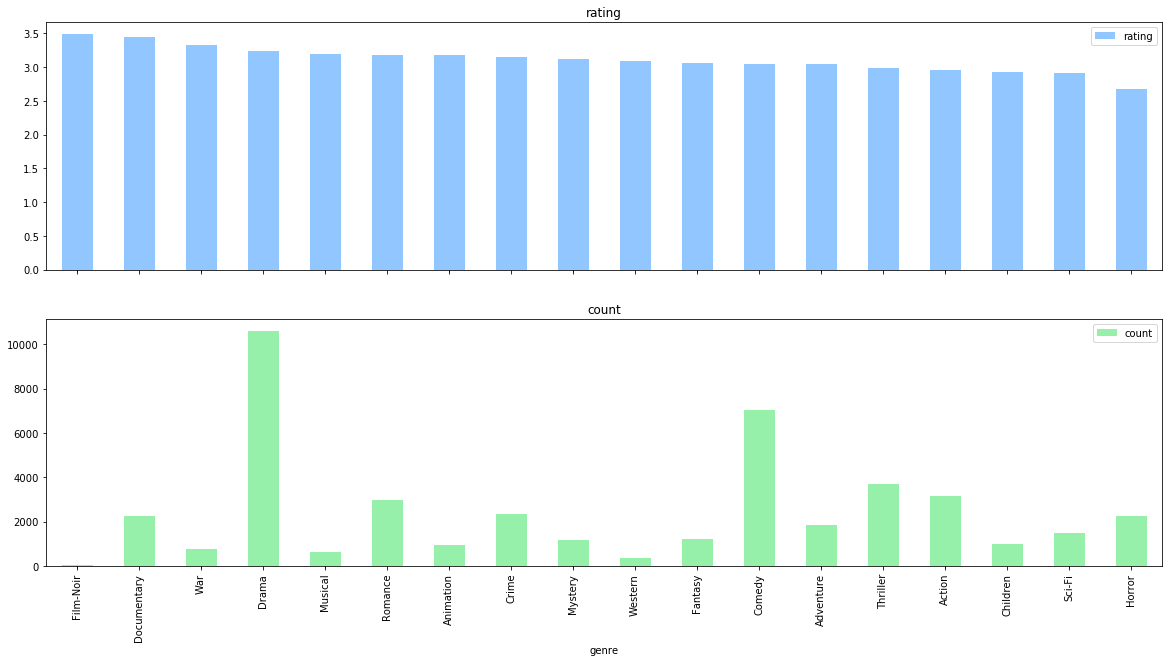

In [29]:
genres_rating_df.sort_values(by=['rating'], inplace=True, ascending=False)
genres_rating_df.plot.bar(figsize=(20,10), x='genre', subplots=True)
plt.style.use('seaborn-pastel')
plt.savefig("genre_1965-2015.png", transparant=True)
plt.show()

<p style="font-family: Calibri; font-size:2.00em;color:cadetblue; font-style:bold">
Popularity of genres over the years</p>

As is clearly shown in the graph above, *Film-Noir* movies have the highest average rating, whereas *Horror* scores lowest.
This triggers the question if Film-Noir has always been the most popular movie genre, or if this has changed over time.

In [30]:
genre = []
rating = []
year = []

for i in genres_list:
    for y in range(1965, 2016):
        a = (movies50[movies50[i] == 1][movies50['year'] == y])['rating'].mean()
        genre.append(i)
        year.append(y)
        rating.append(a)

C:\Users\chant\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [31]:
# Add the average rating per genre per year to a dataframe
genres_rating_year_df = pd.DataFrame(columns=['genre', 'rating', 'year'])
genres_rating_year_df['genre'] = genre
genres_rating_year_df['rating'] = rating
genres_rating_year_df['year'] = year
genres_rating_year_df.head()

,genre,rating,year
0,Adventure,2.992970,1965
1,Adventure,3.100351,1966
2,Adventure,3.012586,1967
3,Adventure,3.336008,1968
4,Adventure,3.140035,1969


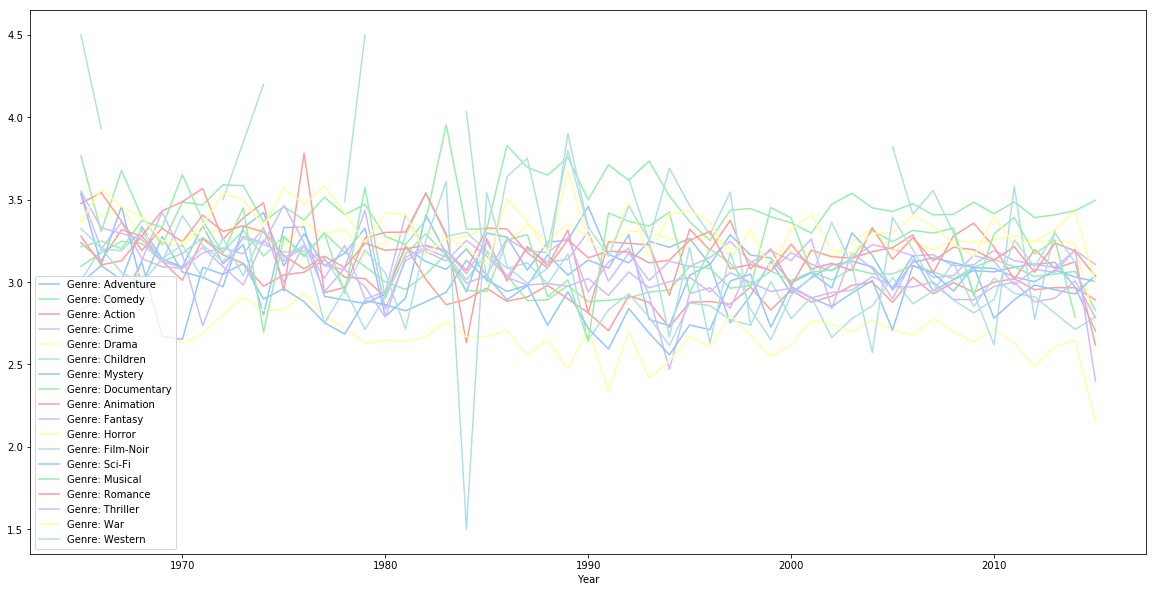

In [32]:
fig, ax = plt.subplots(figsize=(20,10))

for i in genres_list:
    genre = genres_rating_year_df['rating'][genres_rating_year_df['genre'] == i]
    year = genres_rating_year_df['year'][genres_rating_year_df['genre'] == i]
    ax.plot(year, genre, label= "Genre: {}".format(i))
    
plt.xlabel("Year")
ax.legend(loc='best')
ax.plot()
plt.savefig("genre_change_1965-2015.png", transparant=True)
plt.show()

The figure above shows that even though the rating of the individual genres fluctuates over time, the rating normally does not seem to extend outside a range of minimum 2.5 and a maximum 3.5. However, this figure is quite difficult to read in terms of determining the change in popularity of a genre over time. A parallel plot might better explain this.

In [33]:
genres_rating_year_df.head()

,genre,rating,year
0,Adventure,2.992970,1965
1,Adventure,3.100351,1966
2,Adventure,3.012586,1967
3,Adventure,3.336008,1968
4,Adventure,3.140035,1969


In [34]:
genres_change = genres_rating_year_df.pivot(index='genre', columns='year', values='rating')
genres_change = genres_change.reset_index()

genres_change['1970r'] = genres_change[1970].rank(ascending=0).fillna(19).astype(int)
genres_change['1980r'] = genres_change[1980].rank(ascending=0).fillna(19).astype(int)
genres_change['1990r'] = genres_change[1990].rank(ascending=0).fillna(19).astype(int)
genres_change['2000r'] = genres_change[2000].rank(ascending=0).fillna(19).astype(int)
genres_change['2010r'] = genres_change[2010].rank(ascending=0).fillna(19).astype(int)

decades_rank = ['genre', '1970r', '1980r', '1990r', '2000r', '2010r']
drop_years = [year for year in genres_change.columns if year not in decades_rank]
genres_change.drop(drop_years, inplace=True, axis=1)
genres_change.head(20)

year,genre,1970r,1980r,1990r,2000r,2010r
0,Action,15,11,13,13,13
1,Adventure,11,9,9,14,11
2,Animation,2,2,14,10,5
3,Children,4,10,17,16,12
4,Comedy,9,7,12,8,7
5,Crime,13,8,5,6,6
6,Documentary,3,3,1,2,1
7,Drama,8,4,6,5,4
8,Fantasy,10,14,11,7,9
9,Film-Noir,19,19,4,19,18


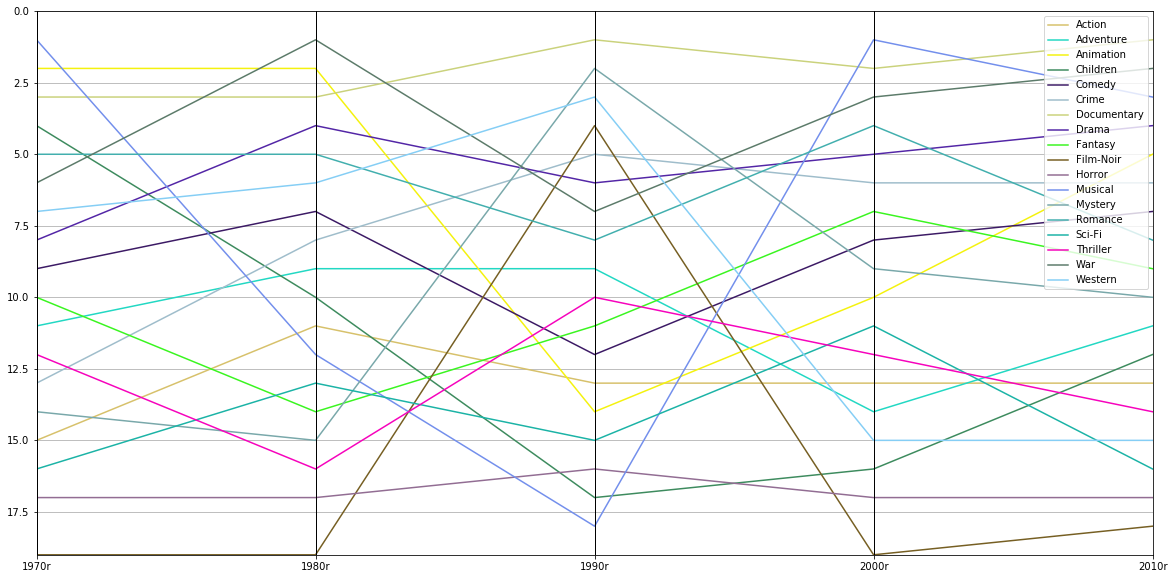

In [35]:
plt.figure(figsize=(20,10))
parallel_coordinates(genres_change,"genre")
axes = plt.gca()
axes.set_ylim([19,0])
plt.savefig("genre_rank_1965-2015.png", transparant=True)
plt.show()